In [1]:
import pandas as pd

df = pd.read_csv('~/Downloads/TIKTOKNONLITE_REVIEWS.csv')

print('Dataset berhasil di-load!')

Dataset berhasil di-load!


In [2]:
# Informasi dataset

print('\033[1mINFORMASI AWAL DATASET\033[0m')
df.info()
print('Jumlah baris:', df.shape[0])
print('Jumlah kolom:', df.shape[1])

INFORMASI AWAL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629909 entries, 0 to 1629908
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   review_id           1629909 non-null  object
 1   pseudo_author_id    1629909 non-null  object
 2   author_name         1629909 non-null  object
 3   review_text         1629756 non-null  object
 4   review_rating       1629909 non-null  int64 
 5   review_likes        1629909 non-null  int64 
 6   author_app_version  1002265 non-null  object
 7   review_timestamp    1629909 non-null  object
dtypes: int64(2), object(6)
memory usage: 99.5+ MB
Jumlah baris: 1629909
Jumlah kolom: 8


In [3]:
# Menampilkan 5 data teratas

df.head()

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,8cf04c82-9db1-40d9-8792-9a7fdc0bbdad,287283603765461488058,Google 用户,Cool video app,5,19,1.0.3,2017-05-18 08:18:19
1,3fcef099-809c-4457-8757-6e35cf5e919d,143415881141484821604,Google 用户,Cool,5,5,NaN,2017-05-21 13:21:47
2,521361eb-bfd6-4644-9e7e-3ea97c888434,216830272881943335897,Google 用户,fany！,5,8,NaN,2017-05-22 03:10:00
3,125e8710-956a-4ed6-9e0b-3789a53563f2,247686926032039695579,Google 用户,COOL,5,0,NaN,2017-05-24 08:19:27
4,569d5d2c-1294-46c2-861c-0cc4d825a3a7,119171566900447147056,Google 用户,funny~,5,3,NaN,2017-05-28 15:52:59


In [4]:
# Data Preprocessing: Deteksi dan Penanganan Missing Values

print('\033[1m== JUMLAH MISSING VALUES DI SETIAP KOLOM ==\033[0m')
print(df.isnull().sum())

# Handling missing values pada kolom review_text dan author_app_version
df['review_text'] = df['review_text'].fillna('')
df['author_app_version'] = df['author_app_version'].fillna('Unknown')

# Jumlah missing values setelah ditangani
print('\n\033[1m== JUMLAH MISSING VALUES DI SETIAP KOLOM ==\033[0m')
print('\033[1m=========== (setelah ditangani) ===========\033[0m')
print(df.isnull().sum())

== JUMLAH MISSING VALUES DI SETIAP KOLOM ==
review_id                  0
pseudo_author_id           0
author_name                0
review_text              153
review_rating              0
review_likes               0
author_app_version    627644
review_timestamp           0
dtype: int64

== JUMLAH MISSING VALUES DI SETIAP KOLOM ==
=========== (setelah ditangani) ===========
review_id             0
pseudo_author_id      0
author_name           0
review_text           0
review_rating         0
review_likes          0
author_app_version    0
review_timestamp      0
dtype: int64


In [5]:
# Data Preprocessing: Deteksi dan Penanganan Inkonsistensi (invalid rating)

# review_rating harus bernilai 1-5
invalid_rating = df[~df['review_rating'].isin([1,2,3,4,5])]
print("\033[1mJumlah baris dengan rating invalid:\033[0m", invalid_rating.shape[0])

print(invalid_rating)

# Hapus baris yang mengandung invalid_rating
df = df[df['review_rating'] != 0]

# Validasi penghapusan baris yang mengandung invalid_rating
print("\n\033[1mJumlah baris dengan rating invalid setelah dibersihkan:\033[0m",df[df['review_rating'] == 0].shape[0])

Jumlah baris dengan rating invalid: 4
                                  review_id       pseudo_author_id  \
28093  2c87c3d4-be07-432b-8f0f-740d444a9efa  201781856128065450887   
31297  dcd0f05a-be87-4336-8c63-941b801390ff  196372423271539505392   
61080  d13a0f35-08be-4833-ad95-e981f598ba04  447048818397436100303   
62601  a601780a-e5e0-481a-aecd-18dacffcf789  167091315928930448177   

         author_name              review_text  review_rating  review_likes  \
28093  A Google user                Love's it              0             0   
31297  A Google user      Like it very much 😘              0             1   
61080  A Google user  Good social chat so fun              0             6   
62601  A Google user           Love Tik Tok❤️              0            11   

      author_app_version     review_timestamp  
28093              2.0.8  2018-05-03 12:37:47  
31297              2.0.9  2018-05-11 05:33:59  
61080              2.6.2  2018-07-15 13:13:28  
62601              2.6.9  20

In [6]:
# Data Preprocessing: Deteksi dan Penanganan Duplikasi Data

# Cek duplikasi data berdasarkan kolom review_id
duplicate = df[df.duplicated(subset=['review_id'])]
print("\033[1mJumlah duplikasi yang ditemukan:\033[0m", duplicate.shape[0])

# Tidak ada penanganan karena tidak terdeteksi duplikasi di dataset

Jumlah duplikasi yang ditemukan: 0


In [7]:
# Data Preprocessing: Ubah Tipe Data Kolom review_timestamp

print('\033[1mTipe data review_timestamp awal:\033[0m', df['review_timestamp'].dtype)

# Ubah tipe data ke datetime
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'], errors='coerce')

# Validasi
print('\033[1mTipe data review_timestamp setelah diganti:\033[0m', df['review_timestamp'].dtype)

Tipe data review_timestamp awal: object
Tipe data review_timestamp setelah diganti: datetime64[ns]


In [8]:
# Informasi dataset setelah data preprocessing

print('\033[1mINFORMASI DATASET SETELAH DATA PREPROCESSING\033[0m')
df.info()
print('Jumlah baris:', df.shape[0])
print('Jumlah kolom:', df.shape[1])

INFORMASI DATASET SETELAH DATA PREPROCESSING
<class 'pandas.core.frame.DataFrame'>
Index: 1629905 entries, 0 to 1629908
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   review_id           1629905 non-null  object        
 1   pseudo_author_id    1629905 non-null  object        
 2   author_name         1629905 non-null  object        
 3   review_text         1629905 non-null  object        
 4   review_rating       1629905 non-null  int64         
 5   review_likes        1629905 non-null  int64         
 6   author_app_version  1629905 non-null  object        
 7   review_timestamp    1629905 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 111.9+ MB
Jumlah baris: 1629905
Jumlah kolom: 8


In [9]:
# Deteksi Outlier Kolom review_likes dengan Statistik Deskriptif

print('\033[1mSTATISTIK DESKRIPTIF DATASET\033[0m')
df['review_likes'].describe()

STATISTIK DESKRIPTIF DATASET


count    1.629905e+06
mean     2.242589e+00
std      1.117523e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.032000e+04
Name: review_likes, dtype: float64

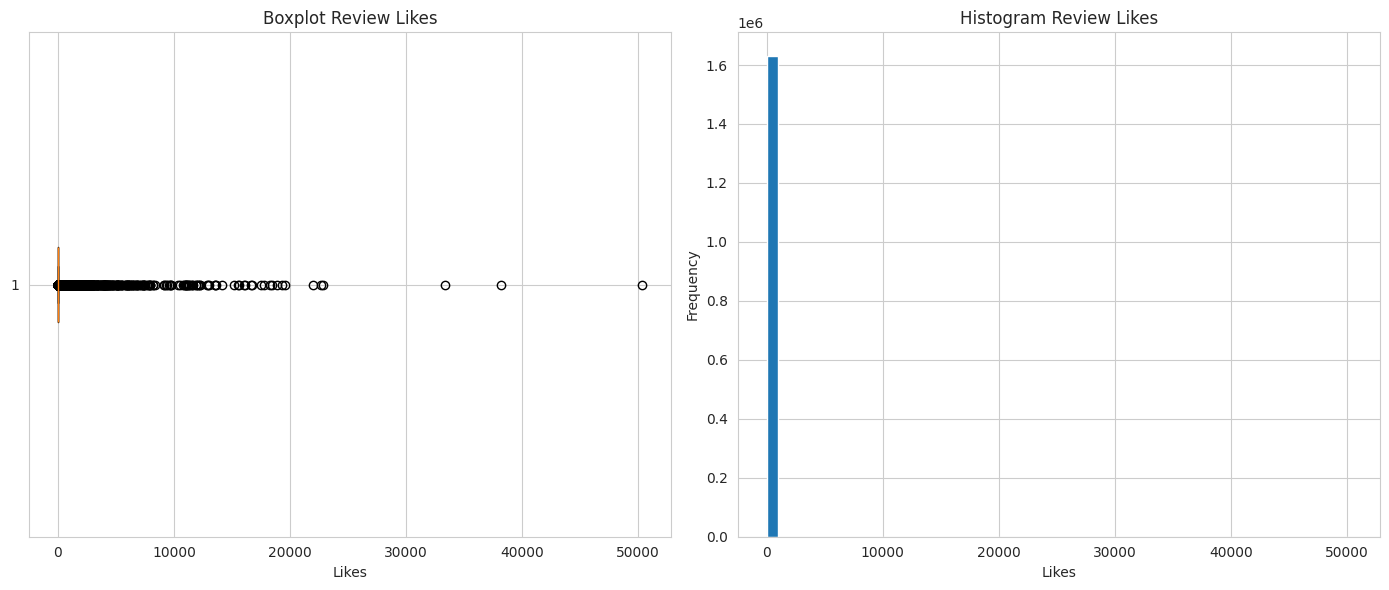

In [10]:
# Visualisasi Deteksi Outlier Kolom review_likes dengan Boxplot dan Histogram 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
axes[0].boxplot(df['review_likes'], vert=False, showfliers=True)
axes[0].set_title('Boxplot Review Likes')
axes[0].set_xlabel('Likes')

# Histogram
axes[1].hist(df['review_likes'], bins=50)
axes[1].set_title('Histogram Review Likes')
axes[1].set_xlabel('Likes')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
# Deteksi Outlier Kolom review_likes dengan Metode IQR
# untuk menentukan batas upper dan lower yang dianggap outlier

import numpy as np

Q1 = df['review_likes'].quantile(0.25)
Q3 = df['review_likes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

outliers = df[df['review_likes'] > upper_bound]
print('\033[1mJumlah outlier yang terdeteksi:\033[0m', len(outliers))

# Handling outlier dengan log transform
df['review_likes_log'] = np.log1p(df['review_likes'])

Jumlah outlier yang terdeteksi: 135119


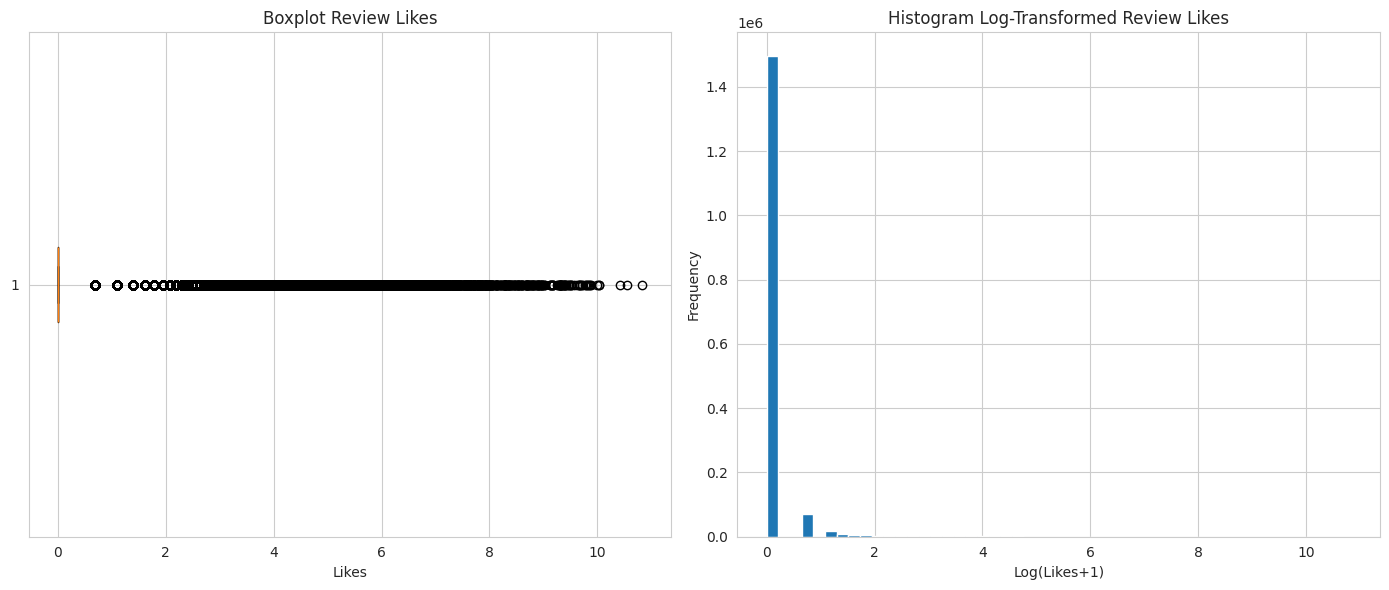

In [12]:
# Visualisasi Kolom review_likes dengan Boxplot dan Histogram Setelah Handling dg Log Transform 

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
axes[0].boxplot(np.log1p(df['review_likes']), vert=False, showfliers=True)
axes[0].set_title('Boxplot Review Likes')
axes[0].set_xlabel('Likes')

# Histogram
axes[1].hist(np.log1p(df['review_likes']), bins=50)
axes[1].set_title('Histogram Log-Transformed Review Likes')
axes[1].set_xlabel('Log(Likes+1)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 4.6 MB/s  0:00:02m 6.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 4.1 MB/s  0:00:08 eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Normalisasi: Kolom review_likes menggunakan MinMaxScaler

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Kolom review_likes_log
df['review_likes_log'] = np.log1p(df['review_likes'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
df['review_likes_norm'] = scaler.fit_transform(df[['review_likes_log']])

# Hasil normalisasi
df[['review_likes', 'review_likes_log', 'review_likes_norm']].head()

,review_likes,review_likes_log,review_likes_norm
0,19,2.995732,0.276712
1,5,1.791759,0.165502
2,8,2.197225,0.202955
3,0,0.000000,0.000000
4,3,1.386294,0.128050


In [2]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 537.2/537.2 kB 316.5 kB/s  0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_7787/2311117768.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_version.values,


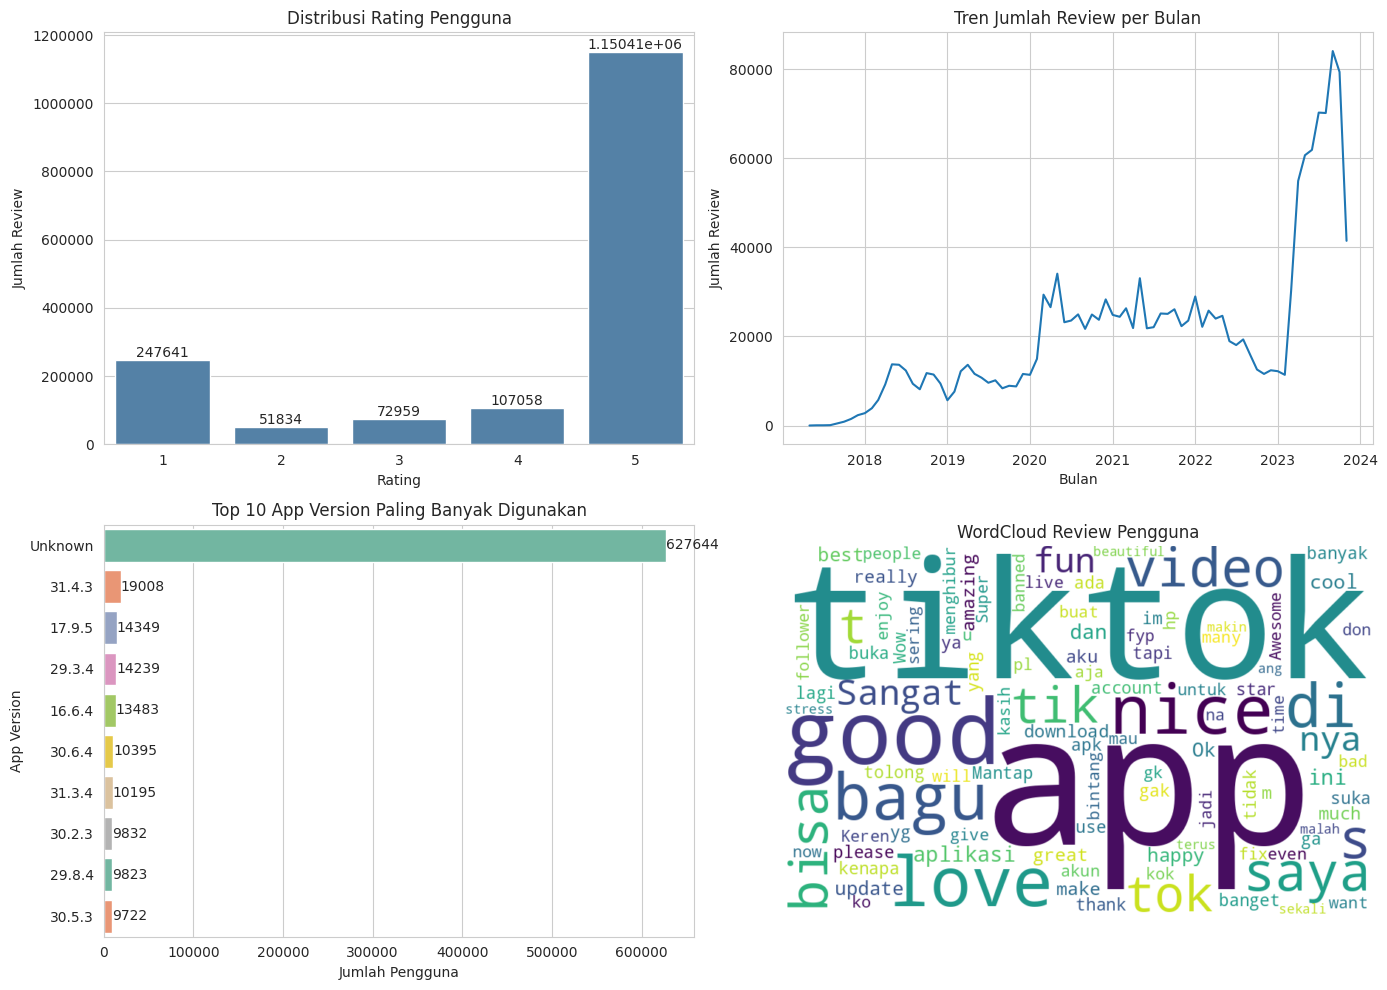

In [39]:
# Dashboard

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import re

sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar Chart - Review Rating
rating_counts = df['review_rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index,
            y=rating_counts.values,
            color='steelblue',
            ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Rating Pengguna')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].ticklabel_format(style='plain', axis='y')
axes[0, 0].set_ylabel('Jumlah Review')
# tambah label angka
for i in axes [0, 0].containers:
    axes[0, 0].bar_label(i)

# Plot - Tren Review per Bulan
df['month'] = df['review_timestamp'].dt.to_period('M')
monthly = df.groupby('month').size()
axes[0, 1].plot(monthly.index.to_timestamp(), monthly.values)
axes[0, 1].set_title('Tren Jumlah Review per Bulan')
axes[0, 1].set_xlabel('Bulan')
axes[0, 1].set_ylabel('Jumlah Review')

# Bar Chart - Top 10 Versi Aplikasi
top_version = df['author_app_version'].value_counts().head(10)
sns.barplot(x=top_version.values, 
            y=top_version.index, 
            palette='Set2', 
            ax=axes[1, 0])
axes[1, 0].set_title('Top 10 App Version Paling Banyak Digunakan')
axes[1, 0].set_xlabel('Jumlah Pengguna')
axes[1, 0].set_ylabel('App Version')
# tambah label angka
for i in axes [1, 0].containers:
    axes[1, 0].bar_label(i)

# Wordcloud dari Review Text
# hapus karakter non-latin, menyisakan huruf alphabet dan spasi
df['clean_text'] = df['review_text'].apply(lambda x: re.sub(r'[^a-zA-Z]+', ' ', str(x)))
# ambil sampel 50.000
df_sample = df['clean_text'].sample(50000, random_state=42)
all_text = ' '.join(df_sample)
wordcloud = WordCloud(width=800, 
                      height=500, 
                      background_color='white', 
                      max_words=100, 
                      collocations=False).generate(all_text)
axes[1, 1].imshow(wordcloud, interpolation='bilinear')
axes[1, 1].axis('off')
axes[1, 1].set_title('WordCloud Review Pengguna')

plt.tight_layout()
plt.show()

In [ ]:
# Machine Learning

In [40]:
from pyspark.sql import SparkSession
s
spark = SparkSession.builder.appName('TikTokReviewAnalysis').getOrCreate()

df = spark.read.csv('~/Downloads/TIKTOKNONLITE_REVIEWS.csv', header=True, inferSchema=True)

25/11/24 21:11:04 WARN Utils: Your hostname, hani-HP-240-G8-Notebook-PC resolves to a loopback address: 127.0.1.1; using 192.168.1.4 instead (on interface wlo1)
25/11/24 21:11:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/24 21:11:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/11/24 21:11:32 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


TypeError: 'JavaPackage' object is not callable

In [42]:
!java -version

openjdk version "21.0.6" 2025-01-21
OpenJDK Runtime Environment JBR-21.0.6+9-895.97-nomod (build 21.0.6+9-b895.97)
OpenJDK 64-Bit Server VM JBR-21.0.6+9-895.97-nomod (build 21.0.6+9-b895.97, mixed mode, sharing)


In [ ]:
# Labeling Sentiment untuk Machine Learning Sentiment Classification

def rating_to_sentiment(r):
    if r <= 2:
        return "negative"
    elif r == 3: 
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df['rating'].apply(rating_to_sentiment)